In [10]:
# coding=utf-8
import jieba
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from hanziconv import HanziConv

In [11]:
# file path
filePath='/Users/youngmihuang/Downloads/corpus.txt'
fileSegWordDonePath ='corpusSegDone.txt'

# read the file by file
fileTrainRead = []
with open(filePath) as fileTrainRaw:
    for line in fileTrainRaw:
        fileTrainRead.append(HanziConv.toTraditional(line))

In [13]:
# define this function to print a list with Chinese
def PrintListChinese(list):
    for i in range(len(list)):
        print list[i],

# segment word with jieba
fileTrainSeg=[]
for i in range(len(fileTrainRead)):
    fileTrainSeg.append([' '.join(list(jieba.cut(fileTrainRead[i][9:-11],cut_all=False)))])
    if i % 50000 == 0 :
        print i

0
50000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
1050000
1100000
1150000
1200000
1250000
1300000
1350000
1400000


In [14]:
# save the result
with open(fileSegWordDonePath,'wb') as fW:
    for i in range(len(fileTrainSeg)):
        fW.write(fileTrainSeg[i][0].encode('utf-8'))
        fW.write('\n')

In [17]:
# jieba seg words transform to word2vec
import word2vec
word2vec.word2vec('corpusSegDone.txt', 'corpusWord2Vec.bin', size=300,verbose=True)

Starting training using file corpusSegDone.txt
Vocab size: 842956
Words in train file: 407852192


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


## Compare to 簡體結果
- Starting training using file corpusSegDone.txt
- Vocab size: 507882
- Words in train file: 391829209

### 以分詞效果看來，簡體分得比較聚合；繁體相對來講有些字他無法合併在一起看，導致字詞數較多

- e.g. "晚自習" 在簡體會被分成 "晚自習"；但在繁體會被分成 "晚" 和 "自習" 兩個單詞

In [20]:
# define this function to print a list with Chinese
def PrintListChinese(list):
    for i in range(len(list)):
        print list[i],
# to test the segment result
PrintListChinese(fileTrainSeg[10])

２ ０ １ ２ 年 東風 標 緻 小 桔 燈 鄉 村小 學圖 書館 計劃 於 ６ 月 ２ ３ 日 － ２ ９ 日 在 湖北省 武漢市 新洲 區鳳凰鎮 郭崗小學 舉行 ， 來 自全國 各地 的 ７ 名誌 願者 帶 著 東風 標 緻 ５ ０ ８ 汽車 捐贈 的 ２ ０ ０ ０ 本新書 ， 建立 起有 一所 “ 小桔 燈鄉 村小 學圖 書館 ” 。 Ｎ 浜 菏行 輪 耷不僅 是 革命 老區 ， 也 是 全國 有名 的 建築 之 鄉 ； 這 裏 的 人 大部分 都 外 齣 從 事 建築業 ， 導 緻 這 裏 的 留守 兒童 比例 其高 。 郭崗 小學現 有 學生 １ ３ ６ 名 （ 含教學點 一處 ） ， 其中 住校 學生 ９ ８ 名 ， 全校 ９ ０ ％ 左右 的 學生 都 是 留守 兒童 。 Ｔ 諢 疃 舉行 之前 ， 學校 圖書室 裏 擺滿 瞭陳舊 的 教科 書 ， 這 裏 的 學生 在 課外 時間 沒有 課外 書 可以 閱讀 ； 在 誌 願者 問學生 喜歡 讀什麼 書 的 時候 ， 大部分 孩子 的 迴 答 是 “ 童話 書 ” ， 當再問 他們 還喜歡 什麼 圖書 的 時候 ， 孩子 迷茫 的 眼神 讓 我們 明白 由 於 沒 有 接觸 過課 外書 ， 很多 孩子 不 知道 除 瞭童 話 書 以外 還有 什麼類 彆 的 書 可以 閱讀 。 Ｎ 瞭改變 這一現 狀 ， 此次 活動 捐贈 的 圖書涵 蓋 瞭童 話 、 中外文 學 、 傳統 文學 、 注音版 和 繪畫 闆 少兒 讀物 等 ； 學校 郭校 長 也 承諾會 在 每天 的 晚 自習 時 對 全校 學生 開放 閱讀 和 藉 書 。 ４ 舜位 疃 也 得到 瞭 文化 、 經濟 各界 名人 的 支持 ， 包括 陳 丹青 、 鄧康延 、 洪晃 、 陸琪 、 蔣 方舟 、 饒雪漫 、 瀋 顥 、 瀋 南 鵬 、 田 立新 、 熊焰 、 張瓊 ， 都 為 鄉村 兒童 推薦 瞭 他們 認為 應該 閱讀 的 圖書 ； 我們 也 在 東風 標 緻 ５ ０ ８ 汽車 的 支持 下 ， 在 捐贈 的 ２ ０ ０ ０ 本書 之外 購買 瞭 上述 人士 推薦 的 圖書 ， 作為 額外 的 補充 捐贈 給學校 。 Ｔ 諞 恢 芑 疃 的 結束 時 ， 誌 願者 們 為 孩子 們 安排 瞭 彆 開生 麵 的 錶 演 ， 幫助 孩子 們 展

In [97]:
# see the word2vector
model = word2vec.load('corpusWord2Vec.bin')
print model.vectors

[[ 0.08015626  0.08850129 -0.07670335 ..., -0.02626957 -0.03316621
   0.0614953 ]
 [-0.02138876 -0.06264357 -0.09334067 ...,  0.00015479 -0.05851945
   0.04908165]
 [-0.00995629 -0.01481206 -0.09394402 ..., -0.01619852 -0.06687199
   0.02453057]
 ..., 
 [ 0.04989554  0.08304838 -0.05676759 ..., -0.00947851  0.07963122
  -0.03377864]
 [-0.01265288  0.07221718  0.10141564 ...,  0.01648477  0.1009445
  -0.07451316]
 [ 0.03596683 -0.08654522  0.03320961 ..., -0.07038685  0.09750576
  -0.03816517]]


In [94]:
# see the example of vocabulary from 996 to 1000
for i in range(995,1000):
    print model.vocab[i]

達到
屏
行為
觀眾
日訊


In [68]:
# check correlation of the specific word
indexes = model.cosine(u'畢業')
for index in indexes[0]:
    print model.vocab[index]

畢業生
離校
考入
剛畢業
大四
學畢業
考上
開學
結業
放暑假


In [73]:
indexes = model.cosine(u'寶寶')
for index in indexes[0]:
    print model.vocab[index]

寶寶的
小寶寶
孩子
準媽媽
寶寶在
胎兒
媽媽們
小孩
小孩子
媽媽


In [74]:
indexes = model.cosine(u'打車')
for index in indexes[0]:
    print model.vocab[index]

坐車
開車
坐火車
買票
下車
買菜
上車
搭車
乘車
騎車


In [80]:
indexes = model.cosine(u'楊冪')
for index in indexes[0]:
    print model.vocab[index]

姚晨
林心如
穎兒
張智霖
劉愷威
馮紹峰
鄧超
周迅
柳岩
李晨


In [76]:
indexes = model.cosine(u'騰訊')
for index in indexes[0]:
    print model.vocab[index]

網易
新浪
百度
優酷
搜狗
凡客
窩窩團
電商
愛奇藝
百視通


In [95]:
# load the word2vec model
rawWordVec = model.vectors
 
# reduce the dimension of word vector
X_reduced = PCA(n_components=2).fit_transform(rawWordVec)
 
# show some word(center word) and it's similar words
index1,metrics1 = model.cosine(u'畢業')
index2,metrics2 = model.cosine(u'寶寶')
index3,metrics3 = model.cosine(u'打車')
index4,metrics4 = model.cosine(u'楊冪')
index5,metrics5 = model.cosine(u'騰訊')
 
# add the index of center word 
index01=np.where(model.vocab==u'畢業')
index02=np.where(model.vocab==u'寶寶')
index03=np.where(model.vocab==u'打車')
index04=np.where(model.vocab==u'楊冪')
index05=np.where(model.vocab==u'騰訊')
 
index1=np.append(index1,index01)
index2=np.append(index2,index02)
index3=np.append(index3,index03)
index4=np.append(index4,index04)
index5=np.append(index5,index05)
 

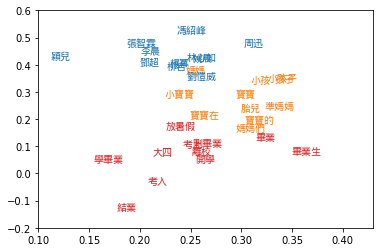

In [110]:
# plot the result
zhfont = matplotlib.font_manager.FontProperties(fname='/Users/youngmihuang/Downloads/wqy-microhei.ttc')
fig = plt.figure()
ax = fig.add_subplot(111)
 
for i in index1:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C3')

for i in index2:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C1')

# for i in index3:
#     ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C7')

for i in index4:
    ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C0')

# for i in index5:
#     ax.text(X_reduced[i][0],X_reduced[i][1], model.vocab[i], fontproperties=zhfont,color='C4')

ax.axis([0.10,0.43, -0.20,0.60])
plt.figure(figsize=(60,60))
plt.show()